3. (35 points) For this question, you can use the decision tree classi
er from sklearn.
Dataset: data
Target Variable: Month
You will have to handle null values in the data.
Split the data into training and testing set (75:25 ratio) using the function you created
in previous question.
Use the same training set for training the following models. You can not use sklearn for
splitting the dataset.
Page 2
• Train a decision tree using both gini index and entropy. Don't change any of other
default values of the classi
er. In the following models, use the criteria which gives
better accuracy on test set. 5 marks
• Train decision trees with di
erent maximum depths [2, 4, 8, 10, 12, 30]. Find the
best value of depth by using testing and training accuracy. Plot the curve between
training and testing accuracy and depth to support your analysis. 10 marks
• Ensembling is a method to combine multiple not-so-good models to get a bet-
ter performing model (more in upcoming lectures). Create 150 di
erent decision
stumps (max depth 4). For each stump, train it on randomly selected 40% of the
training data, i.e., select data for each stump separately. Now, predict the test
samples' labels by taking take majority vote of the output of the stumps. How is
the performance e
ected as compared to part (a) and (b)? 10 marks
• Now, try to tune the decision stumps by changing the max-depth [5, 7, 13, 15, 25,
best achieved from (b)] and number of trees. Analyze the e
ect on the training
and testing accuracy. Use majority vote for 
nal prediction on the test data. 10
marks
Compare the results of the classi
cation models created above on the test set. Rank the
models and analyze if there is a statistically signi
cant di
erence. Add all the analysis
to the report.

In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data_original = pd.read_csv("/Users/ramyanee/Downloads/ML/dataset_3.csv")
data = data_original.copy().drop('No',axis=1)
data = data.sample(frac=1)
data["Date"] = pd.to_datetime(data[['year','month','day']])

In [4]:
data.head()

,year,month,day,hour,A,B,C,D,E,F,G,H,Date
18747,2012,2,21,3,68.0,-13,-6.0,1023.0,cv,3.12,0,0,2012-02-21
6664,2010,10,5,16,60.0,11,25.0,1012.0,SE,10.28,0,0,2010-10-05
150,2010,1,7,6,24.0,-24,-15.0,1035.0,NW,14.30,0,0,2010-01-07
42658,2014,11,13,10,40.0,-11,8.0,1026.0,SE,4.92,0,0,2014-11-13
40587,2014,8,19,3,74.0,18,21.0,1012.0,NE,1.79,0,0,2014-08-19


In [5]:
data_original.head()

,No,year,month,day,hour,A,B,C,D,E,F,G,H
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data.E.unique()
data['E'] = le.fit_transform(data['E'])
data

,year,month,day,hour,A,B,C,D,E,F,G,H,Date
18747,2012,2,21,3,68.0,-13,-6.0,1023.0,3,3.12,0,0,2012-02-21
6664,2010,10,5,16,60.0,11,25.0,1012.0,2,10.28,0,0,2010-10-05
150,2010,1,7,6,24.0,-24,-15.0,1035.0,1,14.30,0,0,2010-01-07
42658,2014,11,13,10,40.0,-11,8.0,1026.0,2,4.92,0,0,2014-11-13
40587,2014,8,19,3,74.0,18,21.0,1012.0,0,1.79,0,0,2014-08-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,2011,3,14,19,16.0,-18,8.0,1027.0,1,120.25,0,0,2011-03-14
16593,2011,11,23,9,13.0,-16,1.0,1036.0,1,222.16,0,0,2011-11-23
28913,2013,4,19,17,57.0,-2,8.0,1022.0,2,21.00,0,0,2013-04-19
40376,2014,8,10,8,24.0,19,24.0,1005.0,3,0.89,0,0,2014-08-10


In [7]:
data.isnull().sum()

year        0
month       0
day         0
hour        0
A        2067
B           0
C           0
D           0
E           0
F           0
G           0
H           0
Date        0
dtype: int64

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,43824.0,2012.000000,1.413842,2010.00,2011.00,2012.00,2013.00,2014.0
month,43824.0,6.523549,3.448572,1.00,4.00,7.00,10.00,12.0
day,43824.0,15.727820,8.799425,1.00,8.00,16.00,23.00,31.0
hour,43824.0,11.500000,6.922266,0.00,5.75,11.50,17.25,23.0
A,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.0
B,43824.0,1.817246,14.433440,-40.00,-10.00,2.00,15.00,28.0
C,43824.0,12.448521,12.198613,-19.00,2.00,14.00,23.00,42.0
D,43824.0,1016.447654,10.268698,991.00,1008.00,1016.00,1025.00,1046.0
E,43824.0,1.663267,0.937981,0.00,1.00,2.00,2.00,3.0
F,43824.0,23.889140,50.010635,0.45,1.79,5.37,21.91,585.6


<AxesSubplot:xlabel='Date', ylabel='A'>

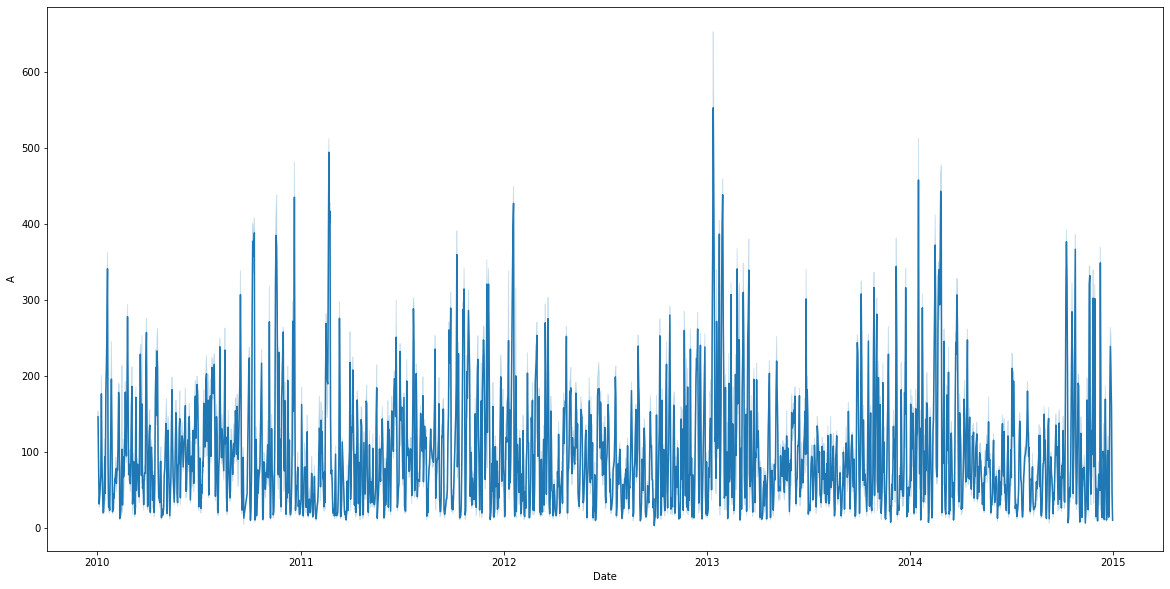

In [9]:
d = data.copy()
d["Date"] = pd.to_datetime(d[['year','month','day']])
plt.figure(figsize=(20,10))
sns.lineplot(data=d,x='Date', y='A')



/Users/ramyanee/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


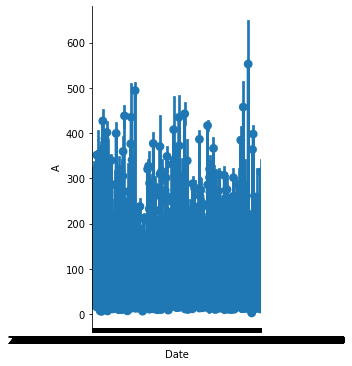

In [10]:
sns.factorplot(data=d,x='Date', y='A')

In [11]:
#y.loc[2010,1]

In [12]:
df_mean = data.copy()
years = data['year'].unique()

for i in years:
  x =data[data.year==i].groupby('month').mean().A
  df_mean['A'] = df_mean.apply(
      lambda row: x[row['month']] if np.isnan(row['A']) and row['year'] == i else row['A'],
      axis=1
  )

In [13]:
data['A'].mode()

0    16.0
dtype: float64

In [14]:
df_mode = data.copy()



In [15]:
df_mode['A'] = df_mode.apply(
      lambda row: 16 if np.isnan(row['A']) else row['A'],
      axis=1
  )

In [16]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 18747 to 8456
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    43824 non-null  int64         
 1   month   43824 non-null  int64         
 2   day     43824 non-null  int64         
 3   hour    43824 non-null  int64         
 4   A       43824 non-null  float64       
 5   B       43824 non-null  int64         
 6   C       43824 non-null  float64       
 7   D       43824 non-null  float64       
 8   E       43824 non-null  int64         
 9   F       43824 non-null  float64       
 10  G       43824 non-null  int64         
 11  H       43824 non-null  int64         
 12  Date    43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 5.7 MB


<AxesSubplot:xlabel='Date', ylabel='A'>

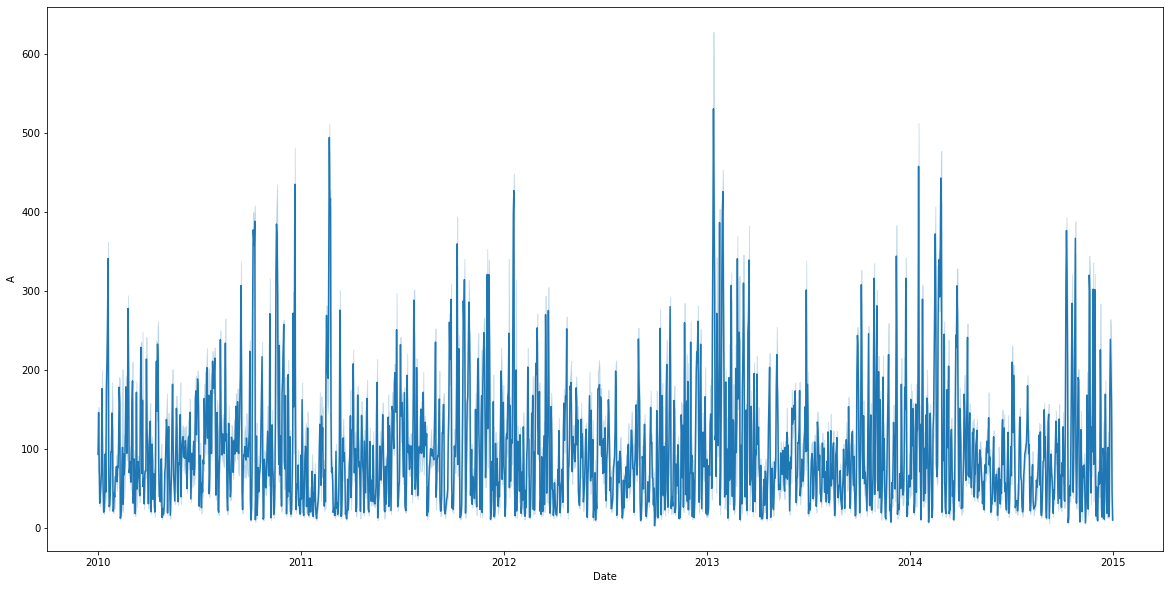

In [17]:
df_intrp = data.copy()
df_intrp = df_intrp.interpolate()
df_intrp["Date"] = pd.to_datetime(df_intrp[['year','month','day']])
plt.figure(figsize=(20,10))
sns.lineplot(data=df_intrp,x='Date', y='A')

In [18]:
# df_mean = data.copy()
# years = data['year'].unique()

# for i in years:
#   x =data[data.year==i].groupby('month').mean().A
#   df_mean['A'] = df_mean.apply(
#       lambda row: x[row['month']] if np.isnan(row['A']) and row['year'] == i else row['A'],
#       axis=1
#   )

In [19]:
#data['Native Country'].fillna(data['Native Country'].mode(), inplace=True)

3. (35 points) For this question, you can use the decision tree classi
er from sklearn.
Dataset: data
Target Variable: Month
You will have to handle null values in the data.
Split the data into training and testing set (75:25 ratio) using the function you created
in previous question.
Use the same training set for training the following models. You can not use sklearn for
splitting the dataset.


• Train a decision tree using both gini index and entropy. Don't change any of other
default values of the classi
er. In the following models, use the criteria which gives
better accuracy on test set. 5 marks


• Train decision trees with di
erent maximum depths [2, 4, 8, 10, 12, 30]. Find the
best value of depth by using testing and training accuracy. Plot the curve between
training and testing accuracy and depth to support your analysis. 10 marks


• Ensembling is a method to combine multiple not-so-good models to get a bet-
ter performing model (more in upcoming lectures). Create 150 di
erent decision
stumps (max depth 4). For each stump, train it on randomly selected 40% of the
training data, i.e., select data for each stump separately. Now, predict the test
samples' labels by taking take majority vote of the output of the stumps. How is
the performance e
ected as compared to part (a) and (b)? 10 marks


• Now, try to tune the decision stumps by changing the max-depth [5, 7, 13, 15, 25,
best achieved from (b)] and number of trees. Analyze the e
ect on the training
and testing accuracy. Use majority vote for 
nal prediction on the test data. 10
marks
Compare the results of the classi
cation models created above on the test set. Rank the
models and analyze if there is a statistically signi
cant di
erence. Add all the analysis
to the report.

In [20]:
def tts(data,target):
  size = len(data)
  train_test_margin = int(0.75*size)

  trainSet = data[:train_test_margin]
  testSet = data[train_test_margin:]

  trainSet_x = trainSet.drop(target,axis=1)
  trainSet_y = trainSet[target]
  testSet_x = testSet.drop(target,axis=1)
  testSet_y = testSet[target]

  return trainSet_x,trainSet_y,testSet_x,testSet_y

In [21]:
def acc_(predictions,testSet_y):
  test_size = len(testSet_y)
  testSet_y = list(testSet_y)
  correct_predictions = 0
  for i in range(test_size):
    if testSet_y[i]==predictions[i]:
      correct_predictions= correct_predictions+1
  return (correct_predictions/test_size)*100

In [22]:

xtrain,ytrain,xtest,ytest = tts(data.drop('Date',axis=1).dropna(),'month')

In [23]:
ytrain

18747     2
6664     10
150       1
42658    11
40587     8
         ..
41040     9
41952    10
35659     1
29358     5
7740     11
Name: month, Length: 31317, dtype: int64

part 1

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini")
c = model.fit(xtrain,ytrain)
p = model.predict(xtest)
acc_(p,ytest)

82.78735632183908

In [25]:
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
acc_(p,ytest)

83.39080459770115

In [26]:

xtrain,ytrain,xtest,ytest = tts(df_mean.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_mean.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))


82.84958013873677
82.76743336984302


In [27]:
xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

83.05038335158818
82.29280759401242


In [28]:
xtrain,ytrain,xtest,ytest = tts(df_mode.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_mode.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

83.16903979554581
83.32420591456736


In [29]:
xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="entropy")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

xtrain,ytrain,xtest,ytest = tts(df_intrp.drop('Date',axis=1),'month')
model = DecisionTreeClassifier(criterion="gini")
c= model.fit(xtrain,ytrain)
p = model.predict(xtest)
print(acc_(p,ytest))

82.91347207009858
82.23804308141658


part 2

In [30]:
depths = [2, 4, 8, 10, 12, 30]

In [31]:
training_accuracies = []
testing_accuracies = []
xtrain,ytrain,xtest,ytest = tts(df_mean.drop('Date',axis=1),'month')

In [32]:
for i in depths:
  model = DecisionTreeClassifier(criterion="entropy",max_depth=i)
  c = model.fit(xtrain,ytrain)
  testing_accuracies.append(acc_(model.predict(xtest),ytest))
  training_accuracies.append(acc_(model.predict(xtrain),ytrain))

Text(0.5, 0, 'tree depths')

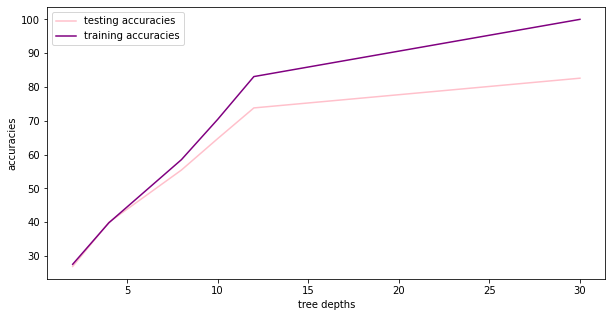

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(x = depths, y=testing_accuracies, color='pink',label='testing accuracies').set_ylabel('accuracies')
sns.lineplot(x = depths, y=training_accuracies, color='purple',label='training accuracies').set_xlabel('tree depths')


In [34]:
def ens(train_data,target,maxdepth,xtest,iter):
  p_tr = []
  p_ts = [] 
  for i in range(iter):
    d = train_data.sample(frac=0.4)
    xtrain,ytrain = d.drop(target,axis=1),d[target]
    model = DecisionTreeClassifier(criterion="entropy",max_depth=maxdepth)
    c = model.fit(xtrain,ytrain) 
    p_ts.append(model.predict(xtest))
    p_tr.append(model.predict(train_data.drop(target,axis=1)))
    
  return p_ts,p_tr




In [35]:
target = 'month'
size = len(df_mean)
train_test_margin = int(0.75*size)

train_data = df_mean[:train_test_margin].drop('Date',axis = 1)
test_data = df_mean[train_test_margin:].drop('Date',axis = 1)

xtest = test_data.drop(target,axis=1)
ytest = test_data[target]

In [36]:
p,q = ens(train_data,'month',4,xtest,150)

In [37]:
a = []
a = a+p+p

In [38]:
np.matrix(a).shape

(300, 10956)

In [39]:
np.matrix(q).shape

(150, 32868)

majority voting

In [40]:
# # p = test predictions, q = training predictions
p,q = pd.DataFrame(np.matrix(p)).transpose(), pd.DataFrame(np.matrix(q)).transpose()


In [41]:
p

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,4,5,4,4,4,5,4,4,4,4,...,5,5,4,4,4,5,4,5,4,10
2,12,11,12,12,12,2,12,2,12,12,...,12,2,11,12,12,12,12,12,11,12
3,4,10,3,10,10,3,10,4,4,10,...,10,3,10,10,10,10,10,4,4,10
4,12,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,12,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
10952,12,12,12,12,12,2,12,12,12,12,...,3,2,12,12,12,12,12,12,12,12
10953,3,10,3,10,10,3,3,3,3,3,...,10,3,3,10,3,10,10,3,3,10
10954,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [42]:
p,q = p.mode(axis=1),q.mode(axis=1)


In [43]:
p,q = np.array(p[0]).astype(int),np.array(q[0]).astype(int)

In [44]:
p.shape

(10956,)

In [45]:
a = []

In [46]:
a.append(p)

In [47]:
a = a + list(p)

In [48]:
np.matrix(a).shape

/Users/ramyanee/opt/anaconda3/lib/python3.8/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


(1, 10957)

In [49]:
acc_(p,list(ytest))

40.81781672143118

part 4

In [50]:
0.4*0.75

0.30000000000000004

In [51]:
depth = [5, 7, 13, 15, 25,30]
trees = [50,100,120,150,200,300]

In [52]:
target = 'month'
size = len(df_intrp)
train_test_margin = int(0.75*size)

train_data = df_intrp[:train_test_margin].drop('Date',axis = 1)
test_data = df_intrp[train_test_margin:].drop('Date',axis = 1)

xtest = test_data.drop(target,axis=1)
ytest = test_data[target]


In [53]:
size

43824

In [54]:

Z = []
W = []


In [55]:
# for t in range(len(trees)):
#   for i in range(len(depth)):
    
#     z,w = ens(train_data,'month',depth[i],xtest,trees[t])
#     z,w = pd.DataFrame(np.matrix(z)).transpose(), pd.DataFrame(np.matrix(w)).transpose()
#     z,w = z.mode(axis=1),w.mode(axis=1)
#     z,w = np.array(z[0]).astype(int),np.array(w[0]).astype(int)
#     Z.append(z)
#     W.append(w)
  
    
#     #print(np.matrix(p).shape,np.matrix(q).shape)

  

In [56]:
# np.matrix(Z).shape

In [57]:
# A,B = Z,W

In [58]:
# np.matrix(A).shape

In [59]:
# np.matrix(B).shape

In [60]:
# Z,W= pd.DataFrame(np.matrix(Z)).transpose(), pd.DataFrame(np.matrix(W)).transpose()
# Z,W = Z.mode(axis=1),W.mode(axis=1)
# Z,W = np.array(Z[0]).astype(int),np.array(W[0]).astype(int)

In [61]:
# np.matrix(Z).shape

In [62]:
# np.matrix(W).shape

In [63]:

# for t in range(len(trees)):
#   for i in range(len(depth)):
#     # print((t,i))
#     a,b = ens(train_data,'month',depth[i],xtest,trees[t])
#     z = z + a
#     w = w + b
#     #print(np.matrix(p).shape,np.matrix(q).shape)

#   Z = Z + z
#   W = W + w



In [64]:
# np.matrix(z).shape

In [65]:
#z = test predictions, w = train predictions

# acc_(Z,ytest)

In [66]:
# acc_(W,ytrain)

In [67]:

n_trees = []
T = []
Ts = []

In [68]:
for t in range(len(trees)):
  test_acc = []#contains accuracies for each value of depth for current number of trees
  train_acc = []
  n_depths = [] 
  for i in range(len(depth)):
    
    z,w = ens(train_data,'month',depth[i],xtest,trees[t])# t trees with depth depth[i]
    z,w = pd.DataFrame(np.matrix(z)).transpose(), pd.DataFrame(np.matrix(w)).transpose()
    z,w = z.mode(axis=1),w.mode(axis=1)
    z,w = np.array(z[0]).astype(int),np.array(w[0]).astype(int)
    p = acc_(z,ytest)
    q = acc_(w,ytrain)
    d = depth[i]
#     test_acc.append(p)
#     train_acc.append(q)
#     n_depths = d
    T.append([p,q,d,t])
  


In [69]:
G = pd.DataFrame(T,columns=['test accuracy','training accuracy','depth','number of trees'])

In [70]:
G

,test accuracy,training accuracy,depth,number of trees
0,44.943410,45.414993,5,0
1,56.261409,58.312036,7,0
2,86.035049,96.026530,13,0
3,88.481198,98.740416,15,0
4,89.448704,99.510162,25,0
5,89.485214,99.534502,30,0
6,44.797371,45.497140,5,1
7,56.334429,58.308994,7,1
8,86.619204,96.388585,13,1
9,89.101862,99.072046,15,1


In [71]:
O=G

In [72]:
e = O['number of trees'].unique()

In [73]:
t =list(O['number of trees'])
    

In [74]:
for i in range(len(t)):
    t[i] = trees[t[i]]

In [75]:
t

[50,
 50,
 50,
 50,
 50,
 50,
 100,
 100,
 100,
 100,
 100,
 100,
 120,
 120,
 120,
 120,
 120,
 120,
 150,
 150,
 150,
 150,
 150,
 150,
 200,
 200,
 200,
 200,
 200,
 200,
 300,
 300,
 300,
 300,
 300,
 300]

In [76]:
O=O.drop('number of trees',axis=1)


In [77]:
O['number of trees'] = t

In [78]:
O

,test accuracy,training accuracy,depth,number of trees
0,44.943410,45.414993,5,50
1,56.261409,58.312036,7,50
2,86.035049,96.026530,13,50
3,88.481198,98.740416,15,50
4,89.448704,99.510162,25,50
5,89.485214,99.534502,30,50
6,44.797371,45.497140,5,100
7,56.334429,58.308994,7,100
8,86.619204,96.388585,13,100
9,89.101862,99.072046,15,100


In [79]:
 I=O.query('depth==5')

Text(0.5, 1.0, 'accuracies for tree depth of 5')

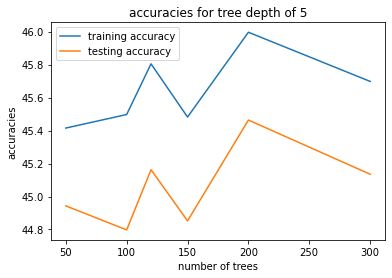

In [80]:
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 5")


Text(0.5, 1.0, 'accuracies for tree depth of 7')

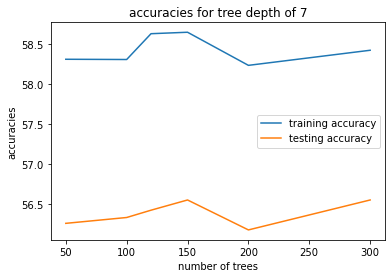

In [81]:
I=O.query('depth==7')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 7")



Text(0.5, 1.0, 'accuracies for tree depth of 13')

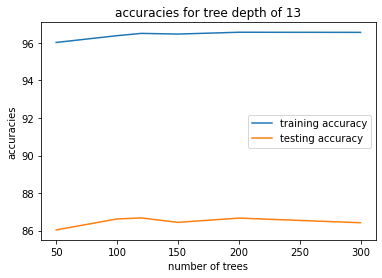

In [82]:
I=O.query('depth==13')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 13")

Text(0.5, 1.0, 'accuracies for tree depth of 15')

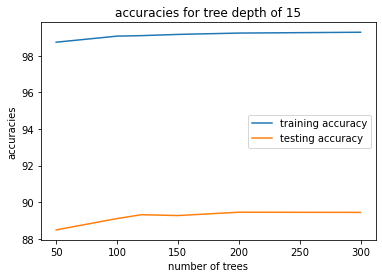

In [83]:
I=O.query('depth==15')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 15")

Text(0.5, 1.0, 'accuracies for tree depth of 25')

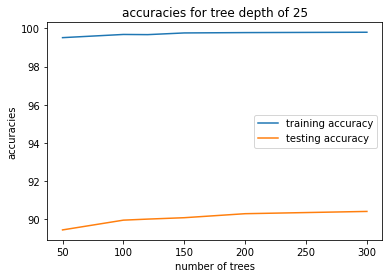

In [84]:
I=O.query('depth==25')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 25")

Text(0.5, 1.0, 'accuracies for tree depth of 30')

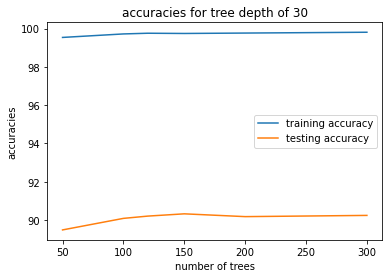

In [85]:
I=O.query('depth==30')
sns.lineplot(x= I['number of trees'],y=I['training accuracy'],label='training accuracy').set_ylabel('accuracies')
sns.lineplot(x= I['number of trees'],y=I['test accuracy'],label='testing accuracy')
plt.title("accuracies for tree depth of 30")

In [88]:
O['test accuracy'].round().mode()

0    90.0
dtype: float64

In [89]:
O['training accuracy'].round().mode()

0    100.0
dtype: float64